# Linear Regression Example

In [1]:
from simplegrad.engine import Num
from simplegrad.nn import FeedForward, mse_loss
import random
import matplotlib.pyplot as plt

In [2]:
# create dataset
input_size = 1
output_size = 1
X = []
Y = []
for _ in range(100):
    x = random.uniform(-10, 10)
    y = 2 * x + 0.3 + random.uniform(-3, 3)
    X.append([Num(x)])
    Y.append(Num(y))

In [3]:
# create model
hidden_size = []
nn = FeedForward(input_size, hidden_size, output_size)

In [4]:
# train
epochs = 100
learning_rate = 0.1

loss_log = []

for epoch in range(epochs):
    '''
    # stochastic gradient descent
    total_loss = 0
    for x, y in zip(X, Y):
        # forward
        y_pred = nn.forward(x)[0]
        loss = mse_loss([y_pred], [y])
        total_loss += loss.value

        # backward
        nn.zero_grad()
        loss.backward()
        nn.update_weights(learning_rate)
    print(f'epoch {epoch}: loss={total_loss/len(X):.8f}')
    '''

    # batch gradient descent
    # forward
    y_preds = []
    for x, y in zip(X, Y):
        y_preds.append(nn.forward(x)[0])
    loss = mse_loss(y_preds, Y)
    print(f'epoch {epoch}: loss={loss.value:.8f}')

    loss_log.append(loss.value)
    
    # update weights
    nn.zero_grad()
    loss.backward()
    nn.update_weights(learning_rate / len(X))

epoch 0: loss=78.49072125
epoch 1: loss=68.87137777
epoch 2: loss=60.47234574
epoch 3: loss=53.13880828
epoch 4: loss=46.73558962
epoch 5: loss=41.14466334
epoch 6: loss=36.26297667
epoch 7: loss=32.00055082
epoch 8: loss=28.27882233
epoch 9: loss=25.02919485
epoch 10: loss=22.19177462
epoch 11: loss=19.71426643
epoch 12: loss=17.55100960
epoch 13: loss=15.66213627
epoch 14: loss=14.01283651
epoch 15: loss=12.57271659
epoch 16: loss=11.31523876
epoch 17: loss=10.21723203
epoch 18: loss=9.25846502
epoch 19: loss=8.42127307
epoch 20: loss=7.69023257
epoch 21: loss=7.05187663
epoch 22: loss=6.49444691
epoch 23: loss=6.00767677
epoch 24: loss=5.58260209
epoch 25: loss=5.21139599
epoch 26: loss=4.88722457
epoch 27: loss=4.60412091
epoch 28: loss=4.35687511
epoch 29: loss=4.14093822
epoch 30: loss=3.95233841
epoch 31: loss=3.78760773
epoch 32: loss=3.64371822
epoch 33: loss=3.51802604
epoch 34: loss=3.40822279
epoch 35: loss=3.31229290
epoch 36: loss=3.22847654
epoch 37: loss=3.15523712
epoc

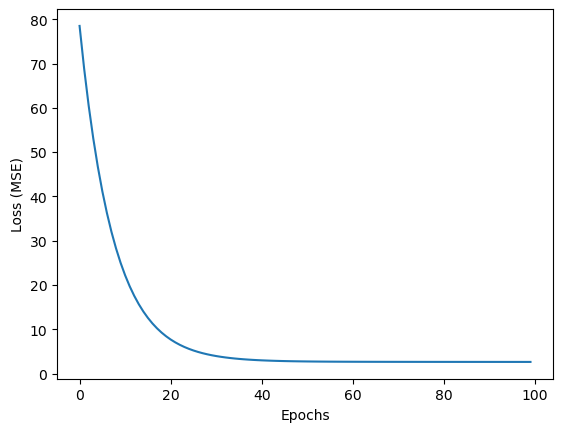

In [5]:
# plot loss
plt.plot(list(range(epochs)), loss_log)
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.show()

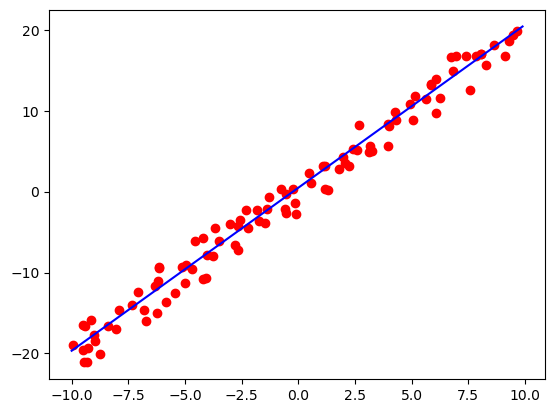

In [6]:
# plot predictions
plt.scatter([x[0].value for x in X], [y.value for y in Y], color='red')
xs = [[Num(i / 10)] for i in range(-100, 100)]
ys = [nn.forward(x)[0] for x in xs]
plt.plot([x[0].value for x in xs], [y.value for y in ys], color='blue')
plt.show()